In [20]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns
from scipy.stats import poisson

In [21]:
#fetching data
df = pd.read_csv(r"data/nyc/KSI15_BM.csv",  sep = ',', header= 0 )
df.head()

,borough,precinct,crashes,Bicyclist Injuries,Bicyclist Fatalities,Motor Vehicle Occupant Injuries,Motor Vehicle Occupant Fatalities
0,Manhattan,1,90,91,0,0,0
1,Manhattan,5,73,75,0,3,0
2,Manhattan,6,58,60,0,0,0
3,Manhattan,7,51,51,0,1,0
4,Manhattan,9,86,87,0,1,0


In [22]:
df2 = df.replace(["Manhattan","Bronx","Brooklyn","Queens","StatenIsland"],[1,2,3,4,5])

In [23]:
df['borough']

0        Manhattan
1        Manhattan
2        Manhattan
3        Manhattan
4        Manhattan
          ...     
72          Queens
73    StatenIsland
74    StatenIsland
75    StatenIsland
76    StatenIsland
Name: borough, Length: 77, dtype: object

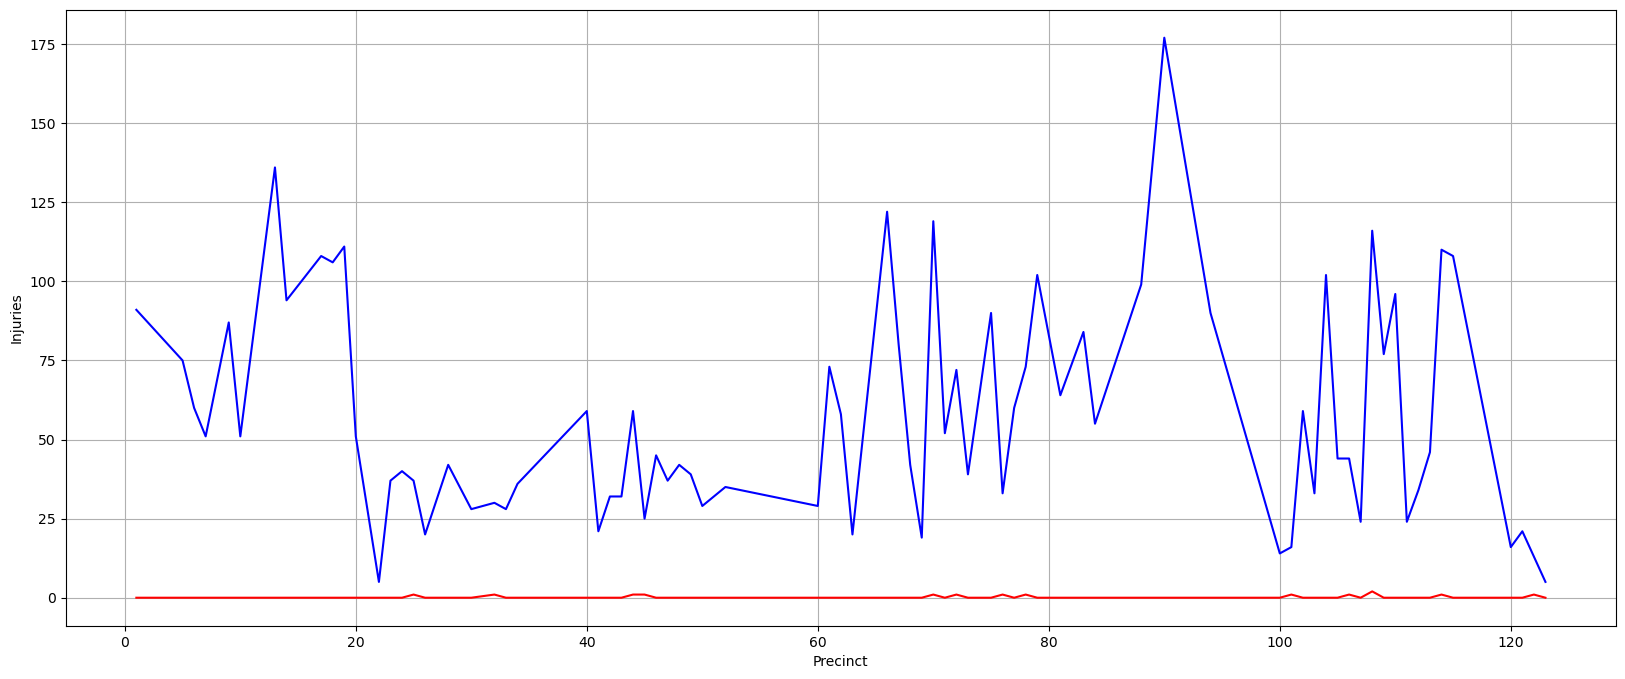

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_ylabel("Injuries")                                
ax.set_xlabel("Precinct")
ax.plot(df.precinct,df['Bicyclist Injuries'],color='blue')
ax.plot(df.precinct, df['Bicyclist Fatalities'],color='red')
plt.show()

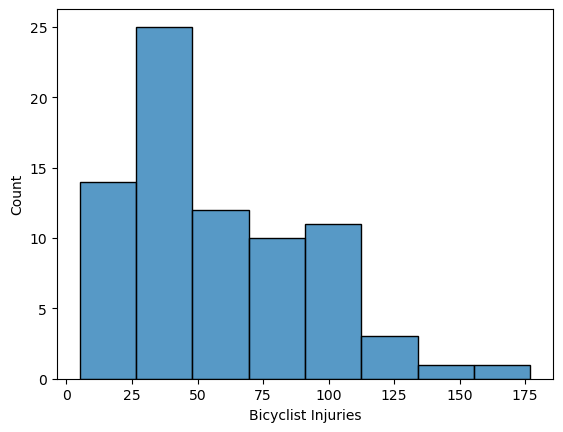

In [25]:
sns.histplot( data=df, x="Bicyclist Injuries", discrete=False)

In [26]:
df["Bicyclist Injuries"].mean()

57.57142857142857

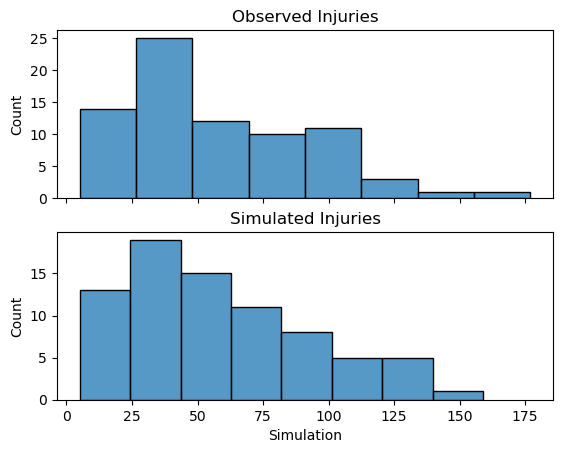

In [28]:
df["Simulation"] = poisson.rvs(df["Bicyclist Injuries"], 
                                  size=df.shape[0] )
fig, axs = plt.subplots(2, sharex=True)
sns.histplot( data=df, x="Bicyclist Injuries", discrete=False, ax=axs[0])
axs[0].set_title("Observed Injuries")
sns.histplot(data=df, x="Simulation", discrete=False, ax=axs[1])
axs[1].set_title("Simulated Injuries");

In [128]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df2, train_size = .8,random_state =1, shuffle=True)

In [129]:
X_train = train.borough.values.reshape(-1, 1)
y_train = train['Bicyclist Injuries']
#.values.reshape(-1, 1)

X_train.shape,y_train.shape

((61, 1), (61,))

In [130]:
X_test = test.borough.values.reshape(-1, 1)
y_test = test['Bicyclist Injuries']
#

X_test.shape,y_test.shape

((16, 1), (16,))

In [132]:
pipeline = Pipeline([('model', PoissonRegressor())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)

r2_test

-0.003286750062823529

In [133]:
y_pred_train = pipeline.predict(X_train)
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_train

0.0003613047577694095

<function matplotlib.pyplot.show(*args, **kw)>

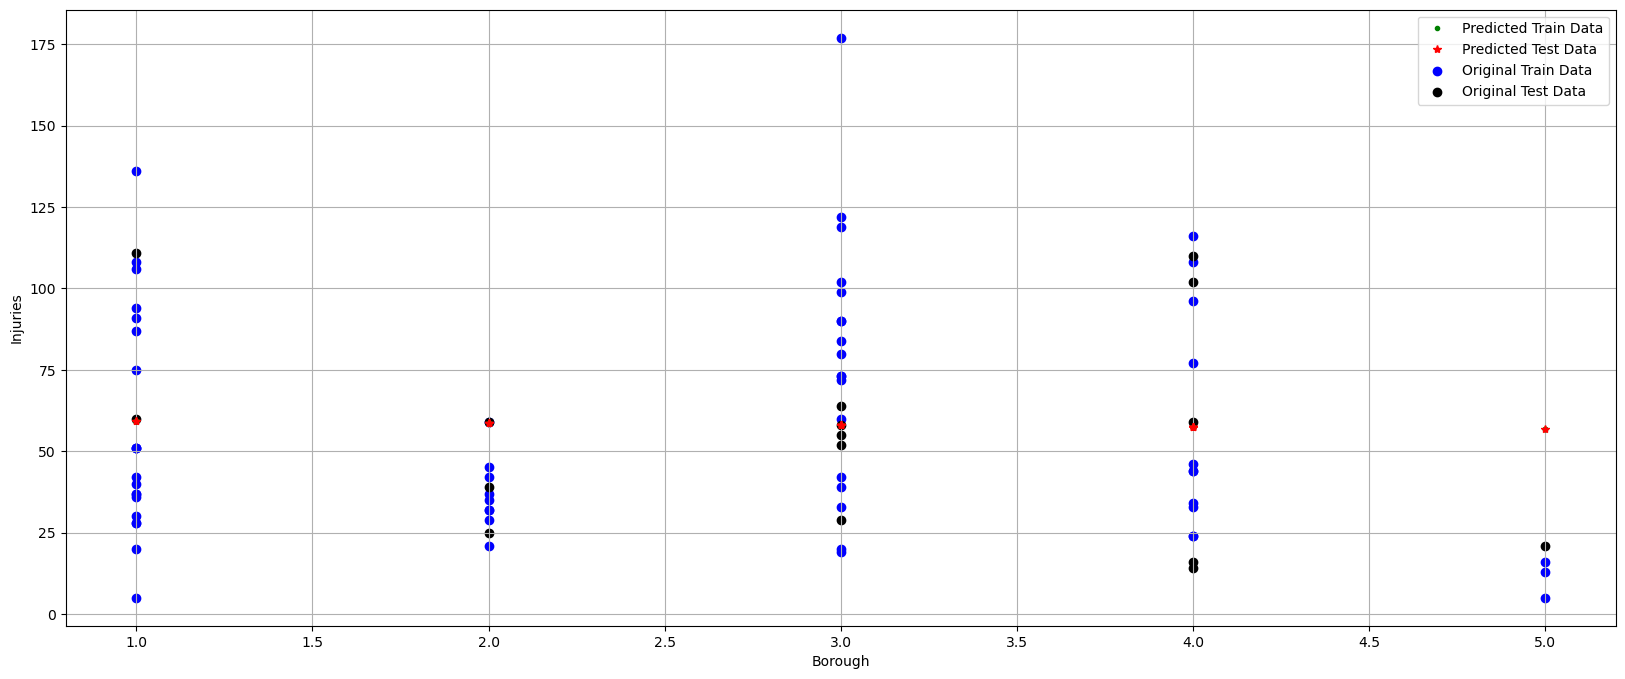

In [134]:
fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_xlabel("Borough")                                
ax.set_ylabel("Injuries")
# train data in blue
ax.scatter(X_train, y_train,color='blue',label="Original Train Data")
ax.plot(X_train, y_pred_train, '.', color='green',label="Predicted Train Data")
# test data
ax.scatter(X_test, y_test,color='black',label="Original Test Data")
ax.plot(X_test, y_pred, '*', color='red',label="Predicted Test Data")
ax.legend()
plt.show

In [58]:
eval = pd.DataFrame({'y_pred': [round(y, 0) for y in y_pred], 'y': y_test}).reset_index()
eval.head()

,index,y_pred,y
0,31,58.0,39
1,43,58.0,52
2,26,59.0,59
3,74,58.0,21
4,58,58.0,16


In [59]:
print('     Frequency table')
eval.groupby(['y', 'y_pred']).agg('count').reset_index().pivot(index='y', columns='y_pred', values='index').fillna(0)

     Frequency table


y_pred,58.0,59.0
y,,
14,1.0,0.0
16,1.0,0.0
21,1.0,0.0
25,0.0,1.0
29,1.0,0.0
39,1.0,0.0
52,1.0,0.0
55,1.0,0.0
58,1.0,0.0


In [67]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv(r"data/nyc/KSI15_BM.csv",  sep = ',', header= 0 )
#df = df.rename_axis('borough').reset_index()
#ds = df.index.to_series()

In [105]:
df['injuries'] = df['Bicyclist Injuries']
df['deaths'] = df['Bicyclist Fatalities']

In [106]:
df.keys()

Index(['borough', 'precinct', 'crashes', 'Bicyclist Injuries',
       'Bicyclist Fatalities', 'Motor Vehicle Occupant Injuries',
       'Motor Vehicle Occupant Fatalities', 'injuries', 'deaths'],
      dtype='object')

In [82]:
df

,borough,precinct,crashes,Bicyclist Injuries,Bicyclist Fatalities,Motor Vehicle Occupant Injuries,Motor Vehicle Occupant Fatalities,injuries
0,Manhattan,1,90,91,0,0,0,91
1,Manhattan,5,73,75,0,3,0,75
2,Manhattan,6,58,60,0,0,0,60
3,Manhattan,7,51,51,0,1,0,51
4,Manhattan,9,86,87,0,1,0,87
...,...,...,...,...,...,...,...,...
72,Queens,115,106,108,0,0,0,108
73,StatenIsland,120,16,16,0,1,0,16
74,StatenIsland,121,21,21,0,0,0,21
75,StatenIsland,122,13,13,1,0,0,13


In [83]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
expr = """injuries ~ borough + precinct + crashes"""
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

Training data set length=65
Testing data set length=12


In [85]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [86]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               injuries   No. Observations:                   65
Model:                            GLM   Df Residuals:                       58
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.86
Date:                Mon, 23 Jan 2023   Deviance:                       114.92
Time:                        21:04:51   Pearson chi2:                     101.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [87]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
21   34.030822  1.911047      30.484008      37.990308
22   50.614352  3.121840      44.851035      57.118250
24   34.877236  2.074046      31.040137      39.188667
25   34.636969  2.049914      30.843478      38.897026
30   38.408209  2.257996      34.228071      43.098850
38  135.716585  5.780176     124.847602     147.531800
41   32.114921  1.332073      29.607411      34.834797
42  123.218704  4.454117     114.790871     132.265300
52   71.448714  2.160030      67.338119      75.810237
61   98.215467  3.865924      90.923297     106.092479
64   32.808892  1.351067      30.264894      35.566733
76   13.978748  1.979862      10.590329      18.451307


In [88]:
y_test['injuries']

21     36.0
22     59.0
24     32.0
25     32.0
30     42.0
38    122.0
41     19.0
42    119.0
52     84.0
61    102.0
64     24.0
76      5.0
Name: injuries, dtype: float64

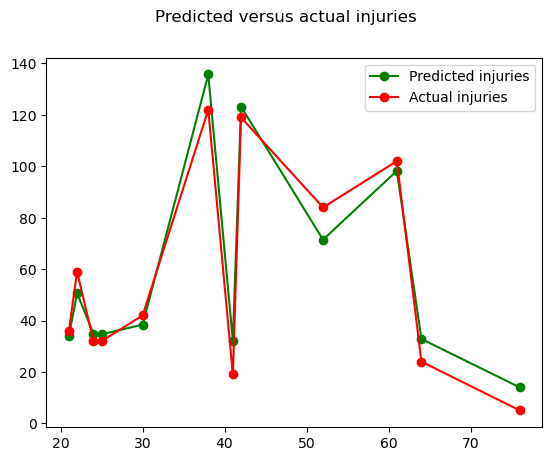

In [89]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['injuries']
fig = plt.figure()
fig.suptitle('Predicted versus actual injuries')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted injuries')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual injuries')
plt.legend(handles=[predicted, actual])
plt.show()

In [90]:
X_test.index

Int64Index([21, 22, 24, 25, 30, 38, 41, 42, 52, 61, 64, 76], dtype='int64')

<Figure size 640x480 with 0 Axes>

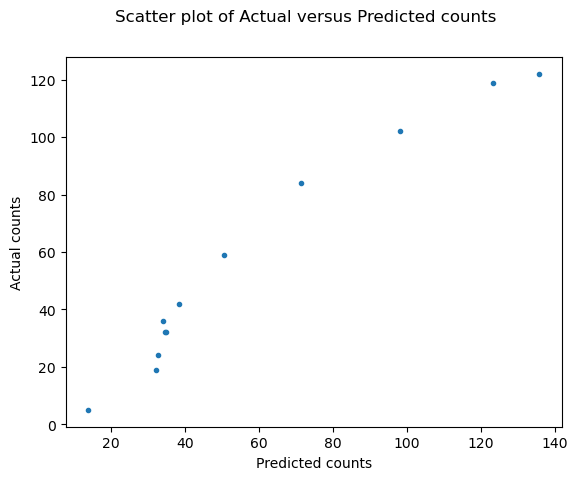

In [91]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [102]:
gen_poisson_gp1 = sm.GeneralizedPoisson(y_train, X_train, p=1)
gen_poisson_gp1_results = gen_poisson_gp1.fit()
print(gen_poisson_gp1_results.summary())

Optimization terminated successfully.
         Current function value: 3.666109
         Iterations: 22
         Function evaluations: 35
         Gradient evaluations: 35
                    GeneralizedPoisson Regression Results                     
Dep. Variable:               injuries   No. Observations:                   65
Model:             GeneralizedPoisson   Df Residuals:                       58
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.2441
Time:                        21:13:47   Log-Likelihood:                -238.30
converged:                       True   LL-Null:                       -315.26
Covariance Type:            nonrobust   LLR p-value:                 1.142e-30
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept   

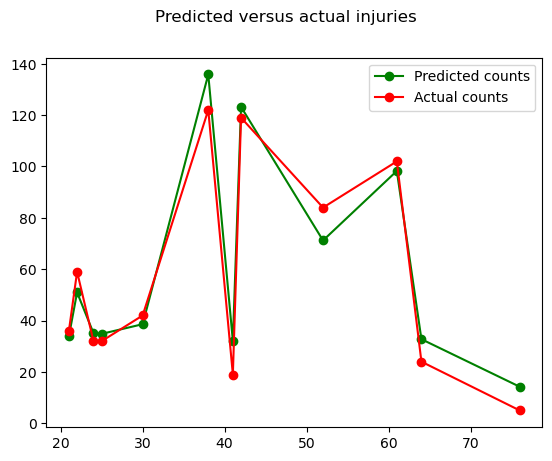

In [103]:
gen_poisson_gp1_predictions = gen_poisson_gp1_results.predict(X_test)
predicted_counts=gen_poisson_gp1_predictions
actual_counts = y_test['injuries']
fig = plt.figure()
fig.suptitle('Predicted versus actual injuries')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

In [104]:
#Build Famoye's Restricted Generalized Poison regression model, know as GP-2
gen_poisson_gp2 = sm.GeneralizedPoisson(y_train, X_train, p=2)
 
#Fit the model
gen_poisson_gp2_results = gen_poisson_gp2.fit()
 
#print the results
print(gen_poisson_gp2_results.summary())

Optimization terminated successfully.
         Current function value: 3.588765
         Iterations: 26
         Function evaluations: 33
         Gradient evaluations: 33
                    GeneralizedPoisson Regression Results                     
Dep. Variable:               injuries   No. Observations:                   65
Model:             GeneralizedPoisson   Df Residuals:                       58
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.2601
Time:                        21:13:53   Log-Likelihood:                -233.27
converged:                       True   LL-Null:                       -315.26
Covariance Type:            nonrobust   LLR p-value:                 8.486e-33
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept   

In [108]:
df

,borough,precinct,crashes,Bicyclist Injuries,Bicyclist Fatalities,Motor Vehicle Occupant Injuries,Motor Vehicle Occupant Fatalities,injuries,deaths
0,Manhattan,1,90,91,0,0,0,91,0
1,Manhattan,5,73,75,0,3,0,75,0
2,Manhattan,6,58,60,0,0,0,60,0
3,Manhattan,7,51,51,0,1,0,51,0
4,Manhattan,9,86,87,0,1,0,87,0
...,...,...,...,...,...,...,...,...,...
72,Queens,115,106,108,0,0,0,108,0
73,StatenIsland,120,16,16,0,1,0,16,0
74,StatenIsland,121,21,21,0,0,0,21,0
75,StatenIsland,122,13,13,1,0,0,13,1


In [112]:
mask = np.random.rand(len(df)) < 0.8
df_train2 = df[mask]
df_test2 = df[~mask]
print('Training data set length='+str(len(df_train2)))
print('Testing data set length='+str(len(df_test2)))
expr = """deaths ~ injuries + borough + precinct + crashes"""
y_train2, X_train2 = dmatrices(expr, df_train2, return_type='dataframe')
y_test2, X_test2 = dmatrices(expr, df_test2, return_type='dataframe')

Training data set length=67
Testing data set length=10


In [117]:
zip_training_results = sm.ZeroInflatedPoisson(endog=y_train2, exog=X_train2, exog_infl=X_train2, inflation='logit').fit()
print(zip_training_results.summary())

         Current function value: 0.458393
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                  deaths   No. Observations:                   67
Model:             ZeroInflatedPoisson   Df Residuals:                       59
Method:                            MLE   Df Model:                            7
Date:                 Mon, 23 Jan 2023   Pseudo R-squ.:                  0.1611
Time:                         21:20:30   Log-Likelihood:                -30.712
converged:                       False   LL-Null:                       -36.612
Covariance Type:             nonrobust   LLR p-value:                    0.1074
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
inflate_Intercept         

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [118]:
zip_predictions = zip_training_results.predict(X_test2,exog_infl=X_test2)
predicted_counts=np.round(zip_predictions)
actual_counts = y_test['deaths']
print('ZIP RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts,actual_counts),2)))))

ValueError: shapes (10,7) and (8,) not aligned: 7 (dim 1) != 8 (dim 0)

In [119]:
X_test2.shape

(10, 7)